# 프로젝트 : 모든 장르 간 편향성 측정해 보기

## 라이브러리 불러오기

In [29]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

import os

import matplotlib.pyplot as plt
from konlpy.tag import Okt
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns; 

## 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [2]:
# 시놉시스 데이터 불러오기
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end = '')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [3]:
# 품사가 명사인 경우만 남겨 토큰화
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:
                res.append(w[0])    
        tokenized.append(res)

print("슝~")

슝~


In [4]:
# 토큰화된 명사들 갯수 출력
print(len(tokenized))

71156


## 추출된 결과로 embedding model 만들기

In [5]:
# 추출된 결과 임베딩 벡터 만들기
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  

In [6]:
# 워드 임베딩 결과 확인 postive와 유사한 단어 출력
model.wv.most_similar(positive=['영화'])

[('작품', 0.8889665007591248),
 ('다큐멘터리', 0.8422359824180603),
 ('드라마', 0.8172683119773865),
 ('영화로', 0.8011707663536072),
 ('형식', 0.7896799445152283),
 ('코미디', 0.7788904905319214),
 ('실화', 0.7657104730606079),
 ('주제', 0.7575952410697937),
 ('감동', 0.7556262016296387),
 ('소재', 0.7528181672096252)]

In [7]:
model.wv.most_similar(positive=['사랑'])

[('진심', 0.7211516499519348),
 ('아르튬', 0.7175045013427734),
 ('첫사랑', 0.7069494128227234),
 ('가슴', 0.695103108882904),
 ('만남', 0.6950041055679321),
 ('감정', 0.6944627165794373),
 ('이별', 0.6863030791282654),
 ('존경심', 0.6855964660644531),
 ('행복', 0.6813823580741882),
 ('우정', 0.6796296834945679)]

In [8]:
model.wv.most_similar(positive=['연극'])

[('시나리오', 0.892399787902832),
 ('영화감독', 0.8763561248779297),
 ('배우', 0.8740439414978027),
 ('연기', 0.8671422600746155),
 ('대본', 0.8595300912857056),
 ('영감', 0.8575567603111267),
 ('오페라', 0.8557433485984802),
 ('캐스팅', 0.8531363606452942),
 ('공연', 0.8498113751411438),
 ('시대극', 0.8491159081459045)]

## TF/IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기

In [9]:
# 예술영화와 일반 영화 시놉시스 데이터 불러오기


art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:
                    result.append((word[0])) 
    return ' '.join(result)

print("슝~")

슝~


In [10]:
# 품사가 명사인 경우만 남겨 토큰화
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [11]:
# Tfidf 수행하기 위한 객체 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [12]:
# '영화'의 index 확인
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# 에술영화와 일반영화를 대표하는 단어를 찾기 위해 tf_idf 결과 사용
m1 = X[0].tocoo()   
m2 = X[1].tocoo()  

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True) 
w2.sort(key=lambda x: x[1], reverse=True) 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [14]:
# 중복으로 추출된 단어 제거
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [15]:
# 추출된 단어 확인
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [16]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [17]:
# 장르별 시놉시스 데이터
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [18]:
# 품사가 명사인 경우만 남겨 토큰화
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [19]:
# Tfidf 수행하기 위한 객체 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [20]:
# 각 장르별로 대표하는 단어를 찾기 위해 tf_idf 결과 사용
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

## embedding model과 단어 셋으로 WEAT score 구해보기

In [21]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    print(c_a)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    print(mean_A)
    return mean_A - mean_B #, c_a, c_b

In [22]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    print(np.concatenate([s_X, s_Y]))
    return  (mean_X-mean_Y)/std_dev

In [23]:
# WEAT score 결과를 담을 matrix 생성
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [24]:
# WEAT score 계산
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

[[ 1.58852749e-02  2.37981249e-02  6.25904941e-04  4.36225440e-03
   1.58213116e-02 -1.69606274e-03  7.52278185e-03  8.17612186e-03
   2.65810220e-03  1.72242839e-02  1.14178937e-02 -1.08289039e-02
   8.53456557e-03  4.57516545e-03  6.28767395e-03]
 [-4.43724589e-03  6.11661840e-03  1.40314149e-02  1.22893313e-02
   1.00043863e-02  2.20856275e-02  3.58444266e-02  2.69668363e-02
   1.63873602e-02  5.88326761e-03  1.92972994e-03  4.69883978e-02
   1.24939103e-02 -1.21017192e-02 -4.28691594e-04]
 [ 6.00190163e-02  2.16613691e-02  8.63624178e-03  3.03091519e-02
   5.98694198e-03  1.55960117e-02 -1.56134157e-03  1.84486490e-02
   7.68946484e-03  2.12120805e-02  4.36536409e-03  1.59951323e-03
   1.82232726e-02  5.70770446e-03  5.41710015e-03]
 [ 1.00745242e-02  1.76069178e-02  3.59053463e-02  3.31714116e-02
   3.42986919e-02  4.46847379e-02  3.58709022e-02  3.05236839e-02
   2.29213536e-02  2.10468527e-02  8.23469739e-03  3.14582847e-02
   2.54806541e-02  4.28466592e-03  1.06353732e-02]
 [ 9

[[-1.24293081e-02  3.16655524e-02  7.49009708e-03 -7.78092910e-03
   7.23949168e-03  3.63301635e-02  9.68172681e-03  2.62945499e-02
  -1.69830043e-02  4.71135136e-03  5.07239252e-03  1.88738443e-02
   7.32975686e-03  1.07993139e-03  2.42504217e-02]
 [ 4.90604416e-02  4.53483462e-02  4.05477593e-03  3.22055295e-02
   3.77696333e-03  9.33761522e-03  2.97928229e-03  8.98138247e-03
   7.39771575e-02  3.75725795e-03  1.94232271e-03  7.37459492e-03
   3.43889231e-03  1.01224976e-02 -6.77388860e-03]
 [ 5.71975764e-03  3.41232792e-02  7.82782957e-03  4.58599348e-03
   5.83290169e-03  3.30681950e-02  9.78967361e-03  3.23823132e-02
   1.41624333e-02  4.78221290e-03  3.52688739e-03  1.36434752e-02
   6.13540690e-03  2.13232124e-03  9.16248858e-02]
 [ 1.18189100e-02  8.06972161e-02  6.12896401e-03  8.94883927e-03
   4.66882950e-03  2.68786792e-02  6.95919013e-03  3.21300738e-02
   1.55130206e-02  5.27209044e-03  2.75337999e-03  1.16044963e-02
   4.96330392e-03  3.75779578e-03  1.53797446e-02]
 [ 1

[[-1.24293081e-02  3.16655524e-02  7.49009708e-03 -7.78092910e-03
   7.23949168e-03  3.63301635e-02  9.68172681e-03  2.62945499e-02
  -1.69830043e-02  4.71135136e-03  5.07239252e-03  1.88738443e-02
   7.32975686e-03  1.07993139e-03  2.42504217e-02]
 [ 4.90604416e-02  4.53483462e-02  4.05477593e-03  3.22055295e-02
   3.77696333e-03  9.33761522e-03  2.97928229e-03  8.98138247e-03
   7.39771575e-02  3.75725795e-03  1.94232271e-03  7.37459492e-03
   3.43889231e-03  1.01224976e-02 -6.77388860e-03]
 [ 5.71975764e-03  3.41232792e-02  7.82782957e-03  4.58599348e-03
   5.83290169e-03  3.30681950e-02  9.78967361e-03  3.23823132e-02
   1.41624333e-02  4.78221290e-03  3.52688739e-03  1.36434752e-02
   6.13540690e-03  2.13232124e-03  9.16248858e-02]
 [ 1.18189100e-02  8.06972161e-02  6.12896401e-03  8.94883927e-03
   4.66882950e-03  2.68786792e-02  6.95919013e-03  3.21300738e-02
   1.55130206e-02  5.27209044e-03  2.75337999e-03  1.16044963e-02
   4.96330392e-03  3.75779578e-03  1.53797446e-02]
 [ 1

[[ 6.04911037e-02  3.30090560e-02  6.03361242e-02  4.93693836e-02
   1.41538484e-02 -5.41926129e-03  6.51214598e-03  1.88330133e-02
   5.21754799e-03  9.18897707e-03  2.86943186e-03  4.53647022e-04
   7.39367446e-03  1.71290338e-02  3.45598310e-02]
 [ 7.93696493e-02  4.11001593e-02  4.05454151e-02  6.30078986e-02
   5.68520166e-02 -5.69330622e-03  6.01610681e-03  3.20225395e-02
  -5.10874623e-03  4.82001202e-03 -8.20670277e-03  2.02878588e-03
   1.01408027e-02  2.00696439e-02  4.70171236e-02]
 [ 2.72508580e-02  1.66031141e-02  1.11356173e-02  2.88274549e-02
   3.02078519e-02  1.40491771e-02  2.17611715e-02  2.06943117e-02
   1.66057162e-02  2.52145063e-02 -4.06450126e-03  6.15044869e-03
   1.43042728e-02  6.72992691e-03  1.38057200e-02]
 [ 9.35487263e-03  4.75224573e-03  3.91093222e-03  1.09578781e-02
   1.28960069e-02  1.41810430e-02  3.26946303e-02  1.64663102e-02
   9.43964813e-03  2.19219513e-02  2.09649303e-03  1.10839400e-02
   1.15531227e-02  2.03489559e-03  4.02699690e-03]
 [ 7

[[ 5.93669973e-02  1.38908271e-02  2.82509122e-02  3.23956497e-02
   2.21068002e-02  6.39113039e-03  1.84830390e-02  6.46554912e-03
  -5.31855458e-03  7.56688416e-03  2.81610922e-03  5.92148937e-02
   1.78824123e-02  4.45216894e-04  8.22065212e-03]
 [ 7.78947175e-02  5.57955354e-02  3.84845771e-02  4.03363928e-02
   5.48322275e-02  5.90430945e-03  3.14274617e-02  1.98488925e-02
  -5.58750704e-03  2.98791435e-02 -8.05419777e-03  3.97919603e-02
   3.24797779e-02  1.99108501e-03  3.86095531e-02]
 [ 2.67444532e-02  2.96464991e-02  1.46448603e-02  1.62945781e-02
   2.80999523e-02  2.13567838e-02  2.03097481e-02  2.56474912e-02
   1.37881003e-02  2.04674136e-02 -3.98897054e-03  1.09286839e-02
   1.25786075e-02  6.03615446e-03  7.98494741e-03]
 [ 9.18103103e-03  1.26563599e-02  7.75529444e-03  4.66393447e-03
   9.98787675e-03  3.20870653e-02  1.61603168e-02  1.46785285e-02
   1.39175169e-02  8.29835888e-03  2.05753371e-03  3.83825507e-03
   2.20017638e-02  1.08779669e-02  8.08183290e-03]
 [ 7

[[-0.01265917 -0.00703988 -0.00332988 -0.00211338 -0.01559635  0.01284677
   0.00995058  0.00043692  0.01932387  0.00116264  0.0128987   0.00998277
   0.02099172  0.00354211 -0.00879297]
 [ 0.05342499  0.04944764  0.03191153  0.03019408  0.0479184   0.00812347
   0.02670073  0.02993681  0.00496664  0.0349155  -0.003603    0.02490951
   0.03611318  0.00997883  0.03815417]
 [-0.01352633 -0.0038885   0.00130845 -0.00312392  0.00048609  0.00486134
   0.00213444  0.00987068  0.01758884  0.00175063  0.04873491  0.00302403
   0.004758    0.02461076  0.00129879]
 [-0.00850003  0.01381708  0.01068132  0.00107087  0.00959492  0.02785023
   0.02173734  0.01545637  0.01429666  0.00192876  0.00818042 -0.00019936
   0.01993269  0.0269349   0.02554385]
 [ 0.01145522  0.02678143  0.01274968  0.00966861  0.02519758  0.02185282
   0.02169046  0.0174251   0.01041145  0.02051457  0.00731402  0.01254604
   0.03704303  0.00833413  0.01709891]
 [-0.00539568  0.00798476  0.00465291 -0.00068361 -0.00111948  0.

[[ 0.01657505  0.01095262  0.00470342  0.00772901  0.02918629  0.01450707
   0.00737828  0.0209668   0.00388386 -0.00802782  0.0007066   0.00485765
   0.08960848  0.00813191  0.00212803]
 [ 0.03514711  0.01502207  0.0048649  -0.00756784  0.06992541  0.02007314
   0.01269951  0.08421772  0.00244783 -0.00843378  0.00218736  0.00166372
   0.1175742   0.01016313  0.0022237 ]
 [ 0.01346818  0.02118963  0.00297976  0.02459887  0.02370031  0.00833213
   0.00578115  0.04474839  0.00265575  0.02081174  0.00142879  0.00198949
   0.04036805  0.00457067  0.0012191 ]
 [ 0.00417255  0.01711421  0.00175424  0.01398342  0.01432442  0.00096252
   0.00296362  0.0191035   0.00108878  0.02100708  0.0006735   0.00159434
   0.01385784  0.00154543  0.00049415]
 [ 0.00950915  0.01725785  0.00188696  0.01530868  0.02130731  0.00305219
   0.00442474  0.03948903  0.00200403  0.01432262  0.00163527  0.00163124
   0.01172007  0.00295146  0.00068959]
 [ 0.00893195  0.0317723   0.0021031   0.02362295  0.02068959  0.

[[ 0.01657505  0.01095262  0.00470342  0.00772901  0.02918629  0.01450707
   0.00737828  0.0209668   0.00388386 -0.00802782  0.0007066   0.00485765
   0.08960848  0.00813191  0.00212803]
 [ 0.03514711  0.01502207  0.0048649  -0.00756784  0.06992541  0.02007314
   0.01269951  0.08421772  0.00244783 -0.00843378  0.00218736  0.00166372
   0.1175742   0.01016313  0.0022237 ]
 [ 0.01346818  0.02118963  0.00297976  0.02459887  0.02370031  0.00833213
   0.00578115  0.04474839  0.00265575  0.02081174  0.00142879  0.00198949
   0.04036805  0.00457067  0.0012191 ]
 [ 0.00417255  0.01711421  0.00175424  0.01398342  0.01432442  0.00096252
   0.00296362  0.0191035   0.00108878  0.02100708  0.0006735   0.00159434
   0.01385784  0.00154543  0.00049415]
 [ 0.00950915  0.01725785  0.00188696  0.01530868  0.02130731  0.00305219
   0.00442474  0.03948903  0.00200403  0.01432262  0.00163527  0.00163124
   0.01172007  0.00295146  0.00068959]
 [ 0.00893195  0.0317723   0.0021031   0.02362295  0.02068959  0.

[[ 1.70901138e-02  1.48968389e-02  3.77280125e-03  2.05823854e-02
   1.37387644e-02  1.36834448e-02  1.12070050e-02  2.85192076e-02
   1.47621874e-02  2.29446050e-02  1.85678061e-02  1.17741833e-02
   4.54174764e-02  4.20909151e-02  1.34951426e-02]
 [-2.30717920e-02  5.08828647e-03  1.06287263e-02  5.29010547e-03
  -3.83765949e-03  8.65253527e-03 -8.48254003e-03 -3.25128213e-02
   3.25903250e-03 -2.78298976e-03  2.19123177e-02 -2.57592499e-02
   1.69991155e-03 -1.59440488e-02 -7.78053945e-04]
 [ 3.98561964e-03  1.83457825e-02  2.62136031e-02  1.87343601e-02
   5.19088991e-02  5.17795142e-03  6.31264062e-04  1.06291017e-02
   1.54809356e-02  2.17254441e-02  1.34630334e-02  1.40370876e-02
   1.54753281e-02  2.88152061e-02  1.15933521e-02]
 [ 1.19172307e-02  1.82028804e-02  2.86890995e-02  1.52277686e-02
   8.71319603e-03  2.96640545e-02  6.07654592e-03  6.82747923e-03
   3.09119672e-02  2.91086659e-02  2.09771916e-02  1.64030306e-02
   1.74652878e-02  1.13275712e-02  2.37034205e-02]
 [ 1

[[ 1.35509390e-02  3.91444564e-03  4.91789309e-03  2.28867773e-03
   7.79846590e-03  5.37814631e-04  3.78109398e-03  3.63136008e-02
  -9.28802229e-03  1.65453064e-03  1.48200169e-02  7.77501496e-04
   4.95646475e-03  3.46854632e-03  1.12688204e-03]
 [ 1.69308558e-02 -4.47466085e-03 -1.40653932e-02  1.92878034e-03
   5.40280621e-03 -1.16392017e-04 -6.61011320e-03  4.01863828e-03
  -9.75770503e-03  1.54612714e-03  1.15399119e-02  3.47711751e-03
   4.02807770e-03  4.25864616e-03  1.75934879e-03]
 [ 8.33820645e-03  9.44053871e-04 -6.96611172e-03  1.20168796e-03
   1.91227417e-03 -7.27500665e-05  5.72276907e-03  6.07801601e-04
   2.40787566e-02  8.71920201e-04  1.79344974e-02  1.05411978e-02
   2.61229323e-03  1.77513296e-03  1.26089988e-04]
 [ 2.03408999e-03  3.74536845e-03  3.59316007e-03  6.01613254e-04
   2.37978459e-03 -2.10028345e-04  4.23174398e-03 -3.12566455e-03
   2.43047606e-02  5.79986838e-04  3.67395356e-02  1.89966634e-02
   2.67867558e-03  8.22011134e-05  2.81857094e-04]
 [ 5

[[ 0.01526777  0.04571059  0.00076092  0.02109489  0.00829661  0.01637556
  -0.00768509  0.02092937  0.01383117  0.01408086  0.00386674  0.01685792
   0.01759212  0.03057219  0.01838641]
 [ 0.00521499 -0.01770463  0.00787195  0.00542183  0.0140243   0.01494032
   0.0539795   0.00043343 -0.00079743 -0.00393322  0.01089338  0.00271458
   0.00274193  0.02336295  0.02633125]
 [ 0.0188026   0.02555937  0.00272423  0.01920085  0.00865822  0.00179709
  -0.00424488  0.01160525  0.01188203  0.05320144  0.02686633  0.01368777
   0.00915913  0.01739936  0.01981348]
 [ 0.01865614  0.00530545 -0.0003046   0.01560694  0.01709719  0.02487347
   0.01508341  0.01519791  0.02429364  0.00893016  0.02940347  0.02183542
   0.00540756  0.02333497  0.04685636]
 [ 0.0126421   0.00905002 -0.00177321  0.01136565  0.00687032  0.00714301
   0.02923594  0.0075453   0.01141947  0.00798434  0.00909795  0.0093551
   0.00353836  0.00714033  0.01441661]
 [ 0.03522957  0.0317638   0.01766213  0.02306939  0.02411586  0.0

[[ 0.02048127  0.01482365  0.01700616  0.00375427  0.01367127  0.01361622
   0.01171634  0.01342884  0.01115195  0.04188414  0.01017292  0.04519435
   0.00734506  0.01596012  0.01798131]
 [ 0.00526412  0.00506329 -0.02295845  0.01057651 -0.00381881  0.00861003
  -0.0256327  -0.00077423 -0.00844087 -0.01586572 -0.0351865   0.00169156
   0.01075258 -0.01366122 -0.0331699 ]
 [ 0.01864232  0.01825565  0.00396604  0.02608482  0.05165389  0.00515251
   0.01396813  0.0115364   0.00062816  0.02867365  0.00953558  0.0153993
   0.01568341  0.00830939  0.01693346]
 [ 0.01515296  0.01811345  0.01185868  0.02854816  0.00867039  0.02951832
   0.01632245  0.02358697  0.00604669  0.01127192  0.00296498  0.01737949
   0.0219293   0.0089881   0.01338558]
 [ 0.01103504  0.01227436  0.01121404  0.0088333   0.00775209  0.02316169
   0.01056521  0.01108729  0.00261558  0.00629783 -0.00390167  0.00324585
   0.02381392  0.00742652  0.00317191]
 [ 0.02239834  0.03420479  0.01746872  0.02286665  0.00126155  0.0

In [25]:
# WEAT matrix 출력
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.4925141
SF 공연 -0.38535824
SF 공포(호러) -0.68409896
SF 기타 0.36089268
SF 다큐멘터리 0.60396546
SF 드라마 -0.3538845
SF 멜로로맨스 -0.8109529
SF 뮤지컬 0.33479407
SF 미스터리 -0.7065959
SF 범죄 -0.25613576
SF 사극 -0.85729253
SF 서부극(웨스턴) -0.46193376
SF 성인물(에로) -0.5860847
SF 스릴러 -0.55518186
SF 애니메이션 0.36910626
SF 액션 -0.5170375
SF 어드벤처 -0.8183527
SF 전쟁 0.19373178
SF 코미디 -0.45577282
SF 판타지 -0.17565975
가족 공연 0.15391646
가족 공포(호러) -0.20179841
가족 기타 0.7601755
가족 다큐멘터리 0.8424025
가족 드라마 0.23094009
가족 멜로로맨스 -0.6665324
가족 뮤지컬 0.69616777
가족 미스터리 -0.3536759
가족 범죄 0.18246861
가족 사극 -0.13177954
가족 서부극(웨스턴) 0.30367428
가족 성인물(에로) -0.3552411
가족 스릴러 -0.1917727
가족 애니메이션 0.8612652
가족 액션 0.030973412
가족 어드벤처 -0.11228126
가족 전쟁 0.60616297
가족 코미디 0.15823379
가족 판타지 0.41609424
공연 공포(호러) -0.25201
공연 기타 0.94320273
공연 다큐멘터리 0.94588864
공연 드라마 0.06895046
공연 멜로로맨스 -0.7203131
공연 뮤지컬 0.89139426
공연 미스터리 -0.37072894
공연 범죄 0.07246331
공연 사극 -0.38511655
공연 서부극(웨스턴) 0.013574066
공연 성인물(에로) -0.49190912
공연 스릴러 -0.23921011
공연 애니메이션 0.9236902
공연 액션 -0.0

<AxesSubplot:>

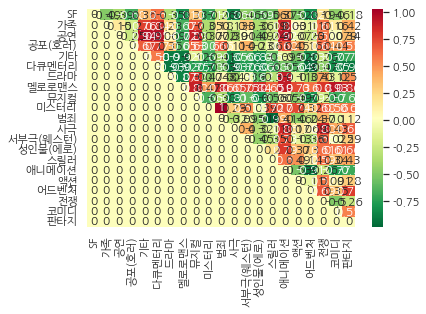

In [30]:
# WEAT 결과 heatmap 시각화
np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax